In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
cycol = cycle('bgrcmk')

In [2]:
def read_exp_res(exp_name):
    control_val = pd.read_csv('results/{0}/control_val_results.csv'.format(exp_name))
    utility_val = pd.read_csv('results/{0}/utility_classifier_val_results.csv'.format(exp_name))
    control_test = pd.read_csv('results/{0}/control_test_results.csv'.format(exp_name))
    utility_test = pd.read_csv('results/{0}/utility_classifier_test_results.csv'.format(exp_name))
    similarity_test = pd.read_csv('results/{0}/utility_similarity_test_results.csv'.format(exp_name))
    return control_val, utility_val, control_test, utility_test, similarity_test

In [3]:
def show_exp_res_tables(exp_name, df1, df2, df3, df4, df5, utility_metric, privacy_loss_metric):
    display("Ctrl Val", df1, "Ctrl Test", df3, "Utility Val", df2, "Utility Test", df4, "Sim Test", df5)
    df_acc = df4[['eps', utility_metric]]
    display("Test " + utility_metric, df_acc)

    df_loss = df5[df5['metric'] == privacy_loss_metric]
    display("All " + privacy_loss_metric, df_loss)

    df_loss_metric = df_loss[['eps', 'mean_all']]
    display("Mean " + privacy_loss_metric, df_loss_metric) 

In [4]:
def plot_exp_res(exp_name, df1, df2, df3, df4, df5, utility_metric, privacy_loss_metric):
    df_u = df4[['eps', utility_metric]]
    df_loss = df5[df5['metric'] == privacy_loss_metric]
    df_loss_metric = df_loss[['eps', 'mean_all']]

    x_u = df_u['eps']
    x_l = df_loss_metric['eps']
    y_u = df_u[utility_metric]
    y_l = df_loss_metric['mean_all']
    no_dp_legend = []
    if x_u[0] == "no_dp":
        x_u = x_u[1:]
        x_l = x_l[1:]
        x_u = np.array(x_u, dtype=int)
        x_l = np.array(x_l, dtype=int)
        plt.hlines(y_u[0], min(x_l), max(x_u), linestyle="dashed", colors=next(cycol))
        plt.hlines(y_l[0], min(x_l), max(x_u), linestyle="dashed", colors=next(cycol))
        no_dp_legend = [exp_name + "_gen_no_dp_" + utility_metric, exp_name + "_gen_no_dp_" + privacy_loss_metric]
        y_u = y_u[1:]
        y_l = y_l[1:]
    
    x_u = np.array(x_u, dtype=int)
    x_l = np.array(x_l, dtype=int)

    plt.plot(x_u, y_u, color=next(cycol))
    plt.plot(x_l, y_l, color=next(cycol))
    plt.xlabel("eps")
    return [exp_name + "_" + utility_metric, exp_name + "_" + privacy_loss_metric] + no_dp_legend



In [5]:
def process_res(exp_name, show_tables=False, utility_metric="acc", privacy_loss_metric = "hamming"):
    tables = read_exp_res(exp_name)
    if show_tables:
        show_exp_res_tables(exp_name, *tables, utility_metric, privacy_loss_metric)
    legend = plot_exp_res(exp_name, *tables, utility_metric, privacy_loss_metric)
    return legend

'exp_4_7'

'Ctrl Val'

,date,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.593472e+09,0,0,-22.499128,835,5,9,831,0.991667


'Ctrl Test'

,date,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.593472e+09,0,0,-22.499128,1187,13,10,1190,0.990417


'Utility Val'

,date,eps,maxdelta,variable_eps,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.593474e+09,no_dp,0,False,0,0,-7.893332,794,46,29,811,0.955357
1,1.593475e+09,1,1,False,0,0,-66.797602,510,330,239,601,0.661310
2,1.593475e+09,1,1,True,0,0,-66.962123,510,330,240,600,0.660714
3,1.593475e+09,10,1,False,0,0,-56.289371,321,519,170,670,0.589881
4,1.593475e+09,10,1,True,0,0,-66.862841,517,323,239,601,0.665476
5,1.593476e+09,20,1,False,0,0,-5.037829,840,0,456,384,0.728571
6,1.593476e+09,20,1,True,0,0,-66.740574,517,323,237,603,0.666667
7,1.593476e+09,50,1,False,0,0,-10.837577,774,66,41,799,0.936310
8,1.593477e+09,50,1,True,0,0,-66.704211,506,334,240,600,0.658333
9,1.593477e+09,100,1,False,0,0,-8.425927,785,55,32,808,0.948214


'Utility Test'

,date,eps,maxdelta,variable_eps,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.593474e+09,no_dp,0,False,0,0,-7.893332,1147,53,57,1143,0.954167
1,1.593475e+09,1,1,False,0,0,-66.797602,715,485,329,871,0.660833
2,1.593475e+09,1,1,True,0,0,-66.962123,716,484,326,874,0.662500
3,1.593475e+09,10,1,False,0,0,-56.289371,454,746,239,961,0.589583
4,1.593475e+09,10,1,True,0,0,-66.862841,721,479,328,872,0.663750
5,1.593476e+09,20,1,False,0,0,-5.037829,1199,1,632,568,0.736250
6,1.593476e+09,20,1,True,0,0,-66.740574,722,478,329,871,0.663750
7,1.593476e+09,50,1,False,0,0,-10.837577,1118,82,62,1138,0.940000
8,1.593477e+09,50,1,True,0,0,-66.704211,699,501,330,870,0.653750
9,1.593477e+09,100,1,False,0,0,-8.425927,1128,72,50,1150,0.949167


'Sim Test'

,date,eps,maxdelta,variable_eps,iter,metric,mean_normal,mean_abnormal,mean_all
0,1.593474e+09,no_dp,0,False,0,hamming,0.143000,0.241607,0.192303
1,1.593474e+09,no_dp,0,False,0,hamming_wise,3.065833,4.788333,3.927083
2,1.593474e+09,no_dp,0,False,0,cosine,0.047466,0.062076,0.054771
3,1.593475e+09,1,1,False,0,hamming,0.904736,0.826462,0.865599
4,1.593475e+09,1,1,False,0,hamming_wise,18.550000,15.964167,17.257083
5,1.593475e+09,1,1,False,0,cosine,0.207244,0.175596,0.191420
6,1.593475e+09,1,1,True,0,hamming,0.918204,0.837087,0.877646
7,1.593475e+09,1,1,True,0,hamming_wise,18.830000,16.165000,17.497500
8,1.593475e+09,1,1,True,0,cosine,0.211003,0.178543,0.194773
9,1.593475e+09,10,1,False,0,hamming,0.413428,0.538847,0.476138


'Test acc'

,eps,acc
0,no_dp,0.954167
1,1,0.660833
2,1,0.662500
3,10,0.589583
4,10,0.663750
5,20,0.736250
6,20,0.663750
7,50,0.940000
8,50,0.653750
9,100,0.949167


'All hamming'

,date,eps,maxdelta,variable_eps,iter,metric,mean_normal,mean_abnormal,mean_all
0,1.593474e+09,no_dp,0,False,0,hamming,0.143000,0.241607,0.192303
3,1.593475e+09,1,1,False,0,hamming,0.904736,0.826462,0.865599
6,1.593475e+09,1,1,True,0,hamming,0.918204,0.837087,0.877646
9,1.593475e+09,10,1,False,0,hamming,0.413428,0.538847,0.476138
12,1.593475e+09,10,1,True,0,hamming,0.911480,0.828430,0.869955
15,1.593476e+09,20,1,False,0,hamming,0.168678,0.315579,0.242129
18,1.593476e+09,20,1,True,0,hamming,0.903606,0.808706,0.856156
21,1.593476e+09,50,1,False,0,hamming,0.143688,0.265336,0.204512
24,1.593477e+09,50,1,True,0,hamming,0.869886,0.712406,0.791146
27,1.593477e+09,100,1,False,0,hamming,0.143164,0.261043,0.202104


'Mean hamming'

,eps,mean_all
0,no_dp,0.192303
3,1,0.865599
6,1,0.877646
9,10,0.476138
12,10,0.869955
15,20,0.242129
18,20,0.856156
21,50,0.204512
24,50,0.791146
27,100,0.202104


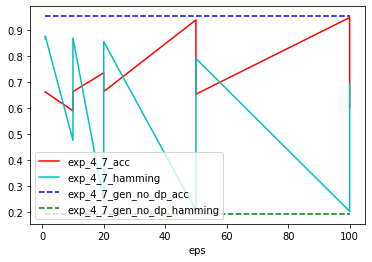

In [7]:
exps = ['exp_4_7']
plot_lengends = []
for exp_name in exps:
    display(exp_name)
    legend = process_res(exp_name, show_tables=True)
    plot_lengends = plot_lengends + legend

plt.legend(plot_lengends)
plt.show()